<a href="https://colab.research.google.com/github/ndhartanto/Skripsi/blob/main/Skripsi_2_textClassification_machineLearning_SVM_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import spacy
import string
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import precision_recall_fscore_support as score

sp = spacy.load('en_core_web_sm')

# for stopwords removal
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
csvFile = open('labeled_vader.csv', 'r')
newFile = open('spacy_vader_LEMMA.csv', 'w')
rows = csv.reader(csvFile)
csvWriter = csv.writer(newFile)

for row in rows:
  # lower case
  sentence = row[0].lower()

  # remove punctuation if any
  sentence = sentence.translate(str.maketrans('', '', string.punctuation))

  sentence = sp(sentence)
    
  # LEMMATISATION
  lemma_list = []
  for word in sentence:
     # CHECK
     # print(word.text, word.lemma_)
     lemma_list.append(word.lemma_)

  no_stopwords =[] 

  for word in lemma_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
      no_stopwords.append(word) 
  print(lemma_list)
  print(no_stopwords)   

  row.append(lemma_list)
  row.append(no_stopwords)
  csvWriter.writerow(row)
    


In [ ]:
import pandas as pd

df = pd.read_csv('spacy_vader_LEMMA.csv') #,sep='\t')
df_new = df.rename(columns={"['text'].1" : 'text_final'})
df_new.head() #CHECK

,text,scores,compound,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,['text'],text_final
0,DAILY NEWS Indonesia Battery Corp Officially F...,"{'neg': 0.094, 'neu': 0.804, 'pos': 0.101, 'co...",0.0516,POSITIF,NaN,NaN,NaN,"['daily', 'news', 'indonesia', 'battery', 'cor...","['daily', 'news', 'indonesia', 'battery', 'cor..."
1,MALACA STRAIT The Malacca Strait is the second...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NETRAL,NaN,NEGATIF,339.0,"['malaca', 'strait', 'the', 'malacca', 'strait...","['malaca', 'strait', 'malacca', 'strait', 'sec..."
2,Trade in Placenta for Drugs in China Continues...,"{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...",0.4449,POSITIF,NaN,NETRAL,150.0,"['trade', 'in', 'placenta', 'for', 'drug', 'in...","['trade', 'placenta', 'drug', 'china', 'contin..."
3,Garuda's Legacy Book Twisted by Dragons The Im...,"{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compou...",0.8591,POSITIF,NaN,POSITIF,405.0,"['garudas', 'legacy', 'book', 'twist', 'by', '...","['garudas', 'legacy', 'book', 'twist', 'dragon..."
4,So whether all this time this virus is closely...,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",0.3182,POSITIF,NaN,NaN,NaN,"['so', 'whether', 'all', 'this', 'time', 'this...","['time', 'virus', 'closely', 'relate', 'global..."


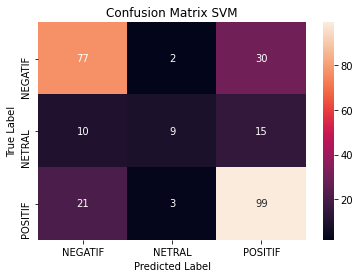

SVM RESULT
Accuracy Score = 0.6954887218045113
Precision = 0.6922278414289693
Recall = 0.6954887218045113
F-score = 0.6816478265253565


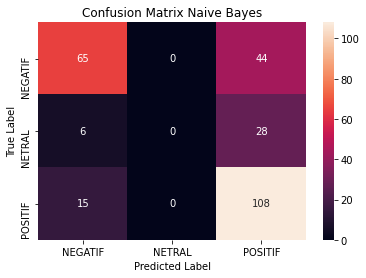

NAIVE BAYES RESULT
Accuracy Score = 0.650375939849624
Precision = 0.587156845602378
Recall = 0.650375939849624
F-score = 0.6028189285093922


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


# HOLD-OUT - Dividing testing and training data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_new['text_final'],df_new['label'],test_size=0.3)

# Label encode - transform Categorical data of string (negatif, netral, positif) into numerical values (0,1,2)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

# TF-IDF Vectorizer 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df_new['text_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# CHECKING
# print(Tfidf_vect.vocabulary_)
# print(Train_X_Tfidf)

# NAIVE BAYES & SVM

# Classifier - Algorithm - Naive Bayes

# fit the training dataset on the classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# Classifier - Algorithm - SVM

# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM RESULT
print("SVM RESULT")
print("Accuracy Score =",accuracy_score(predictions_SVM, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_SVM, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)

conf_matrix = confusion_matrix(Test_Y, predictions_NB)
class_label = ["NEGATIF", "NETRAL", "POSITIF"]
test = pd.DataFrame(conf_matrix, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# NAIVE BAYES RESULT
print("NAIVE BAYES RESULT")
print("Accuracy Score =",accuracy_score(predictions_NB, Test_Y))
precision, recall, fscore, support = score(Test_Y, predictions_NB, average='weighted')
print("Precision =", precision)
print("Recall =", recall)
print("F-score =", fscore)
